# Multilayer Perceptron Implementation
F21BC Coursework 1b

<sub>
    **Student Name:** Heba El-Shimy
    <br>
    **HW ID:** H00280277
</sub>
<hr>

<a id='toc'></a>
### Table of Contents

1. [Importing all needed libraries](#section1)
1. [Loading the dataset](#section2)
1. [Split datasets to training data and labels](#section3)
1. [Visualize a random image from our data and print the corresponding label](#section4)
1. [Normalize the images](#section5)
1. [Building the neural network](#section6)
1. [Experiments](#section7)<br>
    1. [Experiment 1](#section7-1)
    1. [Experiment 2](#section7-2)
    1. [Experiment 3](#section7-3)
    1. [Experiment 4](#section7-4)
    1. [Experiment 5](#section7-5)
    1. [Experiment 6](#section7-6)
    1. [Experiment 7](#section7-7)
    1. [Experiment 8](#section7-8)
    1. [Experiment 9](#section7-9) - Best Model in Performance
    1. [Experiment 10](#section7-10)

<hr>

<a id='section1'></a>
### 1. Importing all the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import random
from scipy import special

<hr>

<a id='section2'></a>
### 2. Loading the dataset

In [2]:
# Using pandas, read csv file into a dataframe
train_data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [3]:
# Display first 5 rows of train data
train_data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Print some info about train and test data
print('Shape of training data: {}'.format(train_data.shape))
print('Shape of test data: {}'.format(test_data.shape))
print('Number of samples in training data: {}'.format(train_data.shape[0]))
print('Number of samples in test data: {}'.format(test_data.shape[0]))
print('Number of pixels after flattening: {}'.format(train_data.shape[1]))

Shape of training data: (60000, 785)
Shape of test data: (10000, 785)
Number of samples in training data: 60000
Number of samples in test data: 10000
Number of pixels after flattening: 785


<hr>

<a id='section3'></a>
[Top](#toc)
### 3. Split datasets to training data and labels

In [5]:
# As we saw in the dataframe, the labels column is the first column, and all other columns
# contain pixel information

# Split the data while converting it from pandas dataframes and series into numpy arrays
X_train = np.array(train_data.iloc[:, 1:])
X_test = np.array(test_data.iloc[:, 1:])
y_train = np.array(train_data.iloc[:, 0])
y_test = np.array(test_data.iloc[:, 0])

In [6]:
# First few rows in training data
# using pandas dataframe only for the purposes of visual clarity
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# First few rows in test data
# using pandas dataframe only for the purposes of visual clarity
pd.DataFrame(X_test).head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# First few rows in training labels
# using pandas dataframe only for the purposes of visual clarity
pd.DataFrame(y_train).head(5)

,0
0,2
1,9
2,6
3,0
4,3


In [9]:
# First few rows in test labels
# using pandas dataframe only for the purposes of visual clarity
pd.DataFrame(y_test).head(5)

,0
0,0
1,1
2,2
3,2
4,3


<hr>

<a id='section4'></a>
[Top](#toc)
### 4. Visualize a random image from our data and print the corresponding label

In [10]:
# Create a new Dataframe with label numbers translated into keywords
d = {'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'Description': ['T-shirt/Top', 'Trousers', 'Pullover', 'Dress',
                                                             'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']}
labels_keywords = pd.DataFrame(d)
display(labels_keywords)

,Description,Label
0,T-shirt/Top,0
1,Trousers,1
2,Pullover,2
3,Dress,3
4,Coat,4
5,Sandal,5
6,Shirt,6
7,Sneaker,7
8,Bag,8
9,Ankle Boot,9


In [11]:
# Reshape the data into original shape
unflattened_X_train = X_train.reshape((60000, 28, 28))
unflattened_X_test = X_test.reshape((10000, 28, 28))

This image has the label: 9, it's a Ankle Boot


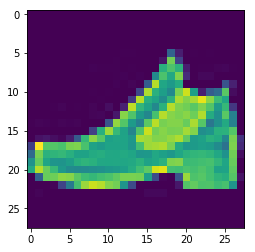

In [12]:
# Pick a random number as image index and visualize it
index = int(np.random.randint(low=0, high=9))
plt.imshow(unflattened_X_train[index])
print('This image has the label: {}, it\'s a {}'.format(y_train[index], labels_keywords.iloc[y_train[index], 0]))

<hr>

<a id='section5'></a>
[Top](#toc)
### 5. Normalize the images

In [13]:
# Dividing by the maximum value of pixels
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [14]:
# View the first few rows of the dataset after normalizing to check that everything is ok
pd.DataFrame(X_train_norm).head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


<hr>

<a id='section6'></a>
[Top](#toc)
### 6. Building the neural network

In [15]:
def data_generator(X, y, batch_size):
    """
    Function that creates a data generator that takes a huge array and outputs small-sized batches of
    the data after being shuffled
    @param X: original data
    @param y: original labels
    @param batch_size: number of samples to extract for the subset
    """
    
    # Extract number of examples
    num_examples = y.shape[0]
    
    # Create a list of indices
    idx = list(range(num_examples))
    
    # Random entries in indices list
    random.shuffle(idx)
    
    # Loop through a the number of examples extracting a subset at a time
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = np.array(idx[i: min(i + batch_size, num_examples)])
        yield X.take(j, axis=0), y.take(j), batch_i

In [16]:
def initialize_parameters(inputs, outputs, hidden_layers=2, init_weights=(-0.05, 0.05), hidden_unit_factor=(2/3)):
    """
    Initialize variables
    @param inputs: the given input or image
    @param outputs: the desired output
    @param hidden_layers: number of hidden layers
    @param init_weights: the range of values that the initial weights will be distributed amongst
    @param hidden_unit_factor: a constant or factor used to calculate the number of hidden units in each layer
    """
    layers_units = [int((inputs.shape[1] + len(np.unique(outputs))) * hidden_unit_factor)]
    weights = {}
    biases = {}

    print('Network architecture:')
    print('\tNumber of hidden layers: {}'.format(hidden_layers))
    print('\tNumber of input units: {}'.format(inputs.shape[1]))

    # Initialize neurons in each hidden layer
    for layer in range(1, hidden_layers+1):
        if (layer != hidden_layers):
            layers_units.append(int((len(np.unique(outputs)) + layers_units[layer-1]) * hidden_unit_factor))
        print('\tNumber of units in hidden layer {}: {}'.format(layer, layers_units[layer-1]))

    print('\tNumber of output units: {}'.format(len(np.unique(outputs))))
    print('-----------------------------------------------------\n')

    # Initialize weights and biases
    print('Initial weights matrix shape:')

    # Create a random matrix of weights for first layer
    weights['W1'] = np.random.uniform(low=init_weights[0], high=init_weights[1], 
                                               size=(inputs.shape[1], layers_units[0]))
    biases['b1'] = np.zeros([layers_units[0], 1]) # Initialize with zero

    print('\tHidden layer 1 weights shape: {}'.format(weights['W1'].shape))
    print('\tHidden layer 1 bias shape: {}\n'.format(biases['b1'].shape))

    # Iterate over the number of hidden layers as given in the arguments
    for layer in range(1, hidden_layers):

        # Initialize weights and biases for each layer
        weights['W'+str(layer+1)] = np.random.uniform(low=init_weights[0], high=init_weights[1],
                                                     size=(layers_units[layer-1], layers_units[layer]))
        biases['b'+str(layer+1)] = np.zeros([layers_units[layer], 1])

        print('\tHidden layer {} weights shape: {}'.format(layer+1, weights['W'+str(layer+1)].shape))
        print('\tHidden layer {} bias shape: {}\n'.format(layer+1, biases['b'+str(layer+1)].shape))

    # Initialize weights and biases for last layer and make its shape relevant to the number of classes
    weights['W'+str(hidden_layers+1)] = np.random.uniform(low=init_weights[0], high=init_weights[1], 
                                               size=(layers_units[-1], len(np.unique(outputs))))
    biases['b'+str(hidden_layers+1)] = np.zeros([len(np.unique(outputs)), 1])

    print('\tOutput layer weights shape: {}'.format(weights['W'+str(hidden_layers+1)].shape))
    print('\tOutput layer bias shape: {}\n'.format(biases['b'+str(hidden_layers+1)].shape))

    print('Weights and biases initialized successfully.')
    print('--------------------------------------------\n')

    return [weights, biases]

In [17]:
def sigmoid(Z):
    """
    Compute sigmoid function
    @param A: value to compute sigmoid for (WX + b)
    """

    Z = np.zeros([1, 1])
    Z = 1 / (1 + np.exp(-Z))

    return A

In [18]:
def tanh(Z):
    """
    Compute tanh function
    @param Z: value to compute tanh for (WX + b)
    """

    return np.tanh(Z)

In [19]:
def relu(Z):
    """
    Compute relu function
    @param Z: value to compute relu for (WX + b)
    """

    # Replace negative values with zero and leave others
    Z[np.where(Z < 0)] = 0

    return Z

In [20]:
def softmax(Z):
    """
    Compute softmax function
    @param Z: value to compute softmax for (WX + b)
    """
    
    return np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)), axis=0, keepdims=True)

In [21]:
def sigmoid_derivative(A):
    """
    Compute sigmoid derivative
    @param A: previously activated value to compute the derivative for
    """

    return A * (1 - A)

In [22]:
def tanh_derivative(A):
    """
    Compute tanh derivative
    @param A:  previously activated value to compute the derivative for
    """

    return 1 - (A ** 2)

In [23]:
def relu_derivative(A):
    """
    Compute relu derivative
    @param A:  previously activated value to compute the derivative for
    """

    A[np.where(A < 0)] = 0
    A[np.where(A >= 0)] = 1

    return A

In [24]:
def cost(A, Y, m, param, lamda, l2_reg=False):
    """
    Compute cost function using cross-entropy
    @param A: predicted label
    @param Y: actual label
    @param m, number of samples
    @param param: a list containing weights and biases
    @param lamda: the value of the regularization constant lambda
    @param l2_reg: a boolean declaring whether L2 regularization is used or not
    """

    L2_reg = 0
    weights = param[0]

    # Adding L2 regularization
    if (l2_reg == True):
        weights_squared = {}
        result = 0

        # Getting the sum of squared weights
        for (key, value) in weights.items():
            weights_squared[key] = np.power(value, 2)
            result += np.sum(weights_squared[key])

        L2_reg = (lamda / (2 * m)) * result

    # Using scipy's xlog1py to handle log(0) cases and very small numbers
    log_probs = (special.xlog1py(Y, A) + special.xlog1py((1 - Y), (1 - A)))

    # Calculate cost accumalation
    cost = ((-1.0 / m) * np.sum(log_probs)) + L2_reg

    return cost

In [25]:
def step_decay(learning_rate, k=0.1):
    """
    Function that calculates the decay for the learning rate
    @param learning_rate: the initial learning rate
    @param k: constant for reducing the learning rate
    """

    learning_rate = k * learning_rate

    return learning_rate

In [26]:
def exp_decay(learning_rate, t, k=0.1):
    """
    Function that calculates the decay for the learning rate
    @param learning_rate: the initial learning rate
    @param t: iteration number
    @param k = constant for reducing the learning rate
    """

    learning_rate = learning_rate * np.exp(-(k * t))

    return learning_rate

In [27]:
def drop(layer_weights, dropout_percent):
    """
    Function to select random units in the network and drop them by making their weights equal to 0
    @param layer_weights: layer weights array
    @param dropout_percent: the percent of units to be dropped from the whole weights array
    """

    # Creating an array matching the size of the weights array, making all units equal to 1
    # and selecting some units based on the given dropout percentage and turning those into 0
    # this array is then multiplied element-wise with the weights array, so that some weights will
    # be randomly dropped by converting to 0
    n = layer_weights.reshape(-1).shape[0]
    k =  int(dropout_percent * n)
    arr = np.array([0] * k + [1] * (n-k))
    np.random.shuffle(arr)
    arr = arr.reshape(layer_weights.shape)
    layer_weights = np.multiply(layer_weights, arr)

    return layer_weights

In [28]:
def vectorize_labels(classes, label):
    """
    Convert labels from an integer to an array of probabilities according to number of classes
    so that if the actual label is 2, the vectorized version of it will be [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    @param classes: the number of classes in the dataset
    @param label: actual label
    """

    proba = np.zeros([classes, 1])
    proba[label] = 1

    return proba

In [29]:
def feed_forward(sample, param, i, activation, epoch, dropout, dropout_percent):
    """
    Function for feed-forward pass of the information
    It basically calculates the sum of weights multiplied by the inputs plus the bias
    then it passes that through an activation function, then the result is passed onto the
    successor layer till the outputs layer is reached
    @param sample: a single training sample (single image)
    @param param: a list containing the wights and biases
    @param i: sample iteration no., it eventually reaches the same no. of total samples in the training set
    @param epoch: iteration number over the whole dataset
    @param activation: a string representing the name of the activation function used
    @param dropout: a boolean decalring whether dropout is to be applied to weights or not
    @param dropout_percent: an integer representing the percentage of units that will be dropped
    """

    weights = param[0]
    biases = param[1]
    hidden_layers = len(weights)-1

    # Input
    history = {'A0': sample.reshape(sample.shape[0], 1)}

    if (i < 1 and epoch < 1):
        print('Starting feed forward of input information for sample no. {}:'.format(i+1))
        print('\n- Input Layer (A0)')
        print('\tShape {}'.format(history['A0'].shape))

    # Calculate the dot product of weights at each layers neurons and add the bias
    for layer in range(1, hidden_layers+2):

        if (i < 1 and epoch < 1): # Only print this once and not at every iteration
            print('\n- Layer {}:'.format(layer))

        history['Z'+str(layer)] = np.array([])
        history['A'+str(layer)] = np.array([])

        if (i < 1 and epoch < 1): # Only print this once and not at every iteration
            print('\tInput shape: {}'.format(history['A'+str(layer-1)].shape))

        # Add drop out if given in the parameters
        if (dropout == True):
            weights['W'+str(layer)] = drop(weights['W'+str(layer)], dropout_percent)
        
        # Calculate the dot product of weights at each layer with the activated output from previous layer and add the bias
        # Z = WX + b, for first layer A0 = X    
        history['Z'+str(layer)] = np.add(np.matmul(np.transpose(weights['W'+str(layer)]), 
                                        history['A'+str(layer-1)]), biases['b'+str(layer)])

        if (i < 1 and epoch < 1):  # Only print this once and not at every iteration
            print('\tCalculating Z{}, the dot product of W{} and A{}, then adding b{}'.format(layer, layer, layer-1, layer))

        # Change the activation function and calculate it according to the given argument
        if (layer != hidden_layers+1):
            if (activation == 'relu'):
                # A = relu(Z)
                history['A'+str(layer)] = relu(history['Z'+str(layer)])
            if (activation == 'tanh'):
                # A = tanh(Z)
                history['A'+str(layer)] = tanh(history['Z'+str(layer)])
            elif (activation == 'sigmoid'):
                # A = sigmoid(Z)
                history['A'+str(layer)] = sigmoid(history['Z'+str(layer)])
            if (i < 1 and epoch < 1):
                print('\tOutput shape ({}): {}'.format('A'+str(layer), history['A'+str(layer)].shape))

        # If we reached the last layer (outputs layer), use the softmax for activation
        elif (layer == hidden_layers+1):
            # A = softmax(Z)
            history['A'+str(layer)] = softmax(history['Z'+str(layer)])

            if (i < 1 and epoch < 1):
                print('\tOutput shape ({}): {}'.format('A'+str(layer), history['A'+str(layer)].shape))

    if (i < 1 and epoch < 1): # Only print this once and not at every iteration
        print('--------------------------------------------\n')

    return history

In [30]:
def backpropagation(sample, label, param, l2_reg, lamda, history, i, epoch, activation):
    """
    Backpropagation function which calculates the loss derivative at each layer and propagates that
    back to the previous layer as a necessary step ro readjust the weights for the next iteration of
    the feed forward algorithm
    @param sample: a single training sample (single image)
    @param label: an integer representing the label of the given sample
    @param param: a list containing the wights and biases
    @param l2_reg: a boolean declaring whether L@ regularization will be used or not
    @param lamda: a float representing the regularization constant lambda
    @param history: a dictionary containing the activation values of the previous feed forward process
    @param i: sample iteration no., it eventually reaches the same no. of total samples in the training set
    @param epoch: iteration number over the whole dataset
    @param activation: a string representing the name of the activation function used
    """

    # Extract needed information from the given parameters
    sample = np.transpose(sample)
    weights = param[0]
    biases = param[1]
    hidden_layers = len(weights) - 1
    dZ = {}
    gradients = {'weights': {}, 'biases': {}}

    if (i < 1 and epoch < 1): # Only print this once and not at every iteration
        print('Starting backpropagation of errors for sample no. {}:'.format(i+1))
        print('\n- Calculating loss derivatives for layer {}'.format(hidden_layers+1))

    # Calculate error for last layer using cross entropy
    # dZ = A - Y
    dZ['dZ'+str(hidden_layers+1)] = history['A'+str(hidden_layers+1)] - vectorize_labels(10, label)

    # Calculate weight gradients by multiplying the output error by the layer's input (the softmax derivative)
    # dW = X.dZ (then divide by no. of samples m outside the loop)
    # Add the regularization term to decay weights, if given in parameters that regularization is to be used
    if (l2_reg == False):
        gradients['weights']['dW'+str(hidden_layers+1)] = np.matmul(history['A'+str(hidden_layers)], 
                                             np.transpose(dZ['dZ'+str(hidden_layers+1)]))
    else:
        gradients['weights']['dW'+str(hidden_layers+1)] = np.add(np.matmul(history['A'+str(hidden_layers)], 
                                             np.transpose(dZ['dZ'+str(hidden_layers+1)])),
                                                                (lamda / 2) * (weights['W'+str(hidden_layers+1)] ** 2))

    # Calculate bias gradients
    # db = dZ (then divide by no. of samples m outside the loop)
    gradients['biases']['db'+str(hidden_layers+1)] = dZ['dZ'+str(hidden_layers+1)]

    # Calculate activation functions derivatives at each layer to create gradients
    for layer in range(hidden_layers, 0, -1):

        if (i < 1 and epoch < 1): # Only print this once and not at every iteration
            print('\n- Calculating loss derivatives for layer {}'.format(layer))

        # Calculate gradients for subsequent layers in the network based on the activation function used
        #if (layer <= self.hidden_layers and layer > 0):
        # dZ(layer-1) = W.dZ(layer) * derivative(dZ(layer-1))
        if (activation == 'relu'):
            dZ['dZ'+str(layer)] = np.multiply(np.matmul(weights['W'+str(layer+1)], dZ['dZ'+str(layer+1)]),
                                                 relu_derivative(history['A'+str(layer)]))
        if (activation == 'tanh'):
            dZ['dZ'+str(layer)] = np.multiply(np.matmul(weights['W'+str(layer+1)], dZ['dZ'+str(layer+1)]),
                                                 tanh_derivative(history['A'+str(layer)]))
        elif(activation == 'sigmoid'):
            dZ['dZ'+str(layer)] = np.multiply(np.matmul(weights['W'+str(layer+1)], dZ['dZ'+str(layer+1)]),
                                                 sigmoid_derivative(history['A'+str(layer)]))
            

        # dW(layer) = dZ(layer).A(layer-1), then divide by no. of samples m outside the loop
        # Add the regularization term to decay weights, if given in parameters that regularization is to be used
        if (l2_reg == False):
            gradients['weights']['dW'+str(layer)] = np.matmul(history['A'+str(layer-1)],
                                                             np.transpose(dZ['dZ'+str(layer)]))
        else:
            gradients['weights']['dW'+str(layer)] = np.add(np.matmul(history['A'+str(layer-1)],
                                                             np.transpose(dZ['dZ'+str(layer)])),
                                                          (lamda / 2) * (weights['W'+str(layer)] ** 2))

        # db(layer) = dZ(layer), then divide by no. of samples m outside the loop
        gradients['biases']['db'+str(layer)] = dZ['dZ'+str(layer)]

    if (i < 1 and epoch < 1): # Only print this once and not at every iteration
        print('--------------------------------------------\n')

    return gradients

In [39]:
def update_weights_and_biases(param, grads, epoch, i, learning_rate, lr_optimizer, optimize_every):
    """
    Function to update the network's weights and biases based on the calculated gardients
    @param param: a list containing the wights and biases
    @param grads: a dictionary of calculated gradients of weights and biases through backpropagation step
    @param epoch: iteration number over the whole dataset
    @param i: sample iteration no., it eventually reaches the same no. of total samples in the training set
    @param learning_rate: a float representing the initial learning rate
    @param lr_optimizer: a string representing the method of learning rate decay used
    """

    # Extract weights and biases from the given parameters
    weights = param[0]
    biases = param[1]
    lr = learning_rate
    
    if (epoch < 1 and i < 1): # Only print this once and not at every iteration
        print('Updating weights and biases\n')
    
    # Optimize the learning rate according to given parameters in the function
    if (epoch > 0 and i % 60000 == 0):
        if (epoch % optimize_every == 0 and lr_optimizer == 'step_decay'):
            lr = step_decay(learning_rate)
            print('Learning rate changed to: {:.7f}'.format(lr))
        elif(epoch % optimize_every == 0 and lr_optimizer == 'exp_decay'):
            lr = exp_decay(learning_rate, epoch)
            print('Learning rate changed to: {:.7f}'.format(lr))

    # Update the weights and biases
    for key, value in weights.items():
        weights[key] = np.subtract(weights[key], (lr * grads['weights']['d'+key]))
    for key, value in biases.items():
        biases[key] = np.subtract(biases[key], (lr * grads['biases']['d'+key]))
        
    if (epoch < 1 and i < 1): # Only print this once and not at every iteration
        print('--------------------------------------------\n')

    return [weights, biases, lr]

In [114]:
def train(X, y, params, activation='relu', epochs=5, batch_size=512, l2_reg=True, lamda=0.5, learning_rate=0.01,
          lr_optimizer='step_decay', dropout=True, dropout_percent=0.5, optimize_every=5):
    """
    Function to train the neural network by combining both the feed forward and backpropagation
    processes but for multiple samples and for multiple training epochs
    @param X: training data
    @param y: training labels
    @param activation: a string representing the activation function used
    @param epochs: an integer representing the number of training iterations over the whole dataset
    @param batch_size: an integer representing the size of the subset of data fed to the model at once
    @param l2_reg: a boolean declaring whether L@ regularization will be used or not
    @param lamda: a float representing the regularization constant lambda
    @param learning_rate: a float representing the initial learning rate
    @param lr_optimizer: a string representing the method of learning rate decay used
    @param dropout: a boolean decalring whether dropout is to be applied to weights or not
    @param dropout_percent: an integer representing the percentage of units that will be dropped
    """
    
    hidden_layers = len(params[0]) - 1
    i = 0
    cost_history = []
    accuracy_history = []

    for epoch in range(epochs):
        c = 0
        clr = 0
        correct = 0
        epoch_loss = 0
        history = {}
        gradients = {}
        num_batches = 0

        # Loop through batches output from data generator
        for mini_X, mini_y, batch_i in data_generator(X, y, batch_size):
            losses = []
            batch_loss = 0
            num_batches = batch_i
            j = 0
            pred = 0

            # Loop through each sample in the current batch
            for sample, label in zip (mini_X, mini_y):
                
                # Start the feed forward process
                if (i == 0):
                    history = feed_forward(sample, params, i, activation, epoch, dropout, dropout_percent)
                else:
                    history = feed_forward(sample, new_params, i, activation, epoch, dropout, dropout_percent)

                # Get predicted class by getting highest probability in the outputs
                pred = np.where(history['A'+str(hidden_layers+1)] == 
                                        np.max(history['A'+str(hidden_layers+1)]))[0][0]

                # Calculate the loss using cross-entropy
                if (i == 0):
                    losses.append(cost(history['A'+str(hidden_layers+1)],
                                            vectorize_labels(10, label),
                                            X.shape[0],
                                            params,
                                            lamda))
                else:
                    losses.append(cost(history['A'+str(hidden_layers+1)],
                                            vectorize_labels(10, label),
                                            X.shape[0],
                                            new_params,
                                            lamda))
                
                # Accumulate loss
                batch_loss += np.sum(losses[j])

                # Loop through predictions and actual labels
                if (pred == label):
                    correct += 1

                # Calculate the gradients
                if (i == 0):
                    grads = backpropagation(sample, label, params, l2_reg, lamda, history, i, epoch, activation)
                else:
                    grads = backpropagation(sample, label, new_params, l2_reg, lamda, history, i, epoch, activation)

                # Update weights and biases after training the current batch
                if (i == 0):
                    new_params = update_weights_and_biases(params, grads, epoch, i, learning_rate,
                                                           lr_optimizer, optimize_every)
                else:
                    new_params = update_weights_and_biases(new_params, grads, epoch, i, lr,
                                                           lr_optimizer, optimize_every)
                
                # Detect and save changes in the learning rate
                lr = new_params[2]
                
                # Update counters
                i += 1
                j += 1
                c += 1
            
            # Accumulate loss
            epoch_loss += batch_loss
            
            # Print status bar
            num_iter = int(X.shape[0] / mini_X.shape[0])
            num_updates = num_batches+1
            update_per = num_iter // num_updates
            print('\nTraining on batch {} ({}/{}):\n'.format(num_batches+1, c, X.shape[0]))
            for k in range(0, num_iter-1):
                if k % update_per == 0:
                    print('*', end='', flush=True)
            print('\n--------------------------------------------\n')

        # Save cost hsitory for every epoch
        cost_history.append(epoch_loss)
            
        # Calculate accuracy
        accuracy = correct / X.shape[0]
        
        # Save accuracy hsitory for every epoch
        accuracy_history.append(accuracy)
        print('Training accuracy: {:.2f}%'.format(accuracy * 100))
        #print('Learning Rate: {:0.6f}'.format(lr))

        print ('Repeat for {} epochs'.format(epochs - (epoch % epochs) - 1))
        print('--------------------------------------------\n')

        print('Epoch number: {} ------------> Loss: {}'.format(epoch+1, epoch_loss))
        print('---------------------------------------------------------------------')
        
        # If cost stays nearly the same for 5 successive iterations, break out of the training loop
        # and declare convergence of the algorithm
        if i > 0:
            if i % 512 == 0 and abs(cost_history[epoch-5] - epoch_loss) <= 0.001:
                print('Covergence reached..Stopping the training iterations')
                break

    return new_params, cost_history, accuracy_history #'Finished training'

In [33]:
def evaluate(test_data, test_labels, params, activation):
    """
    Function that makes predictions on a batch of data, test data specifically, aiming to evaluate
    the model's performance by calculating the accuracy at the end of the prediction process
    @param test_data: test data
    @param test_labels: labels for the test dataset
    @param params: a list containing the weights and biases to be used for prediction
    """

    preds = {}
    i = 0
    correct = 0

    # Loop through samples in the test set
    for sample in test_data:
        history = []
        
        # Start the feed forward process to generate prediction probabilities
        history = feed_forward(sample, params, i, activation, epoch=0, dropout=False, dropout_percent=0)
        
        # Get number of hidden layers from the number of weights found in the parameters
        hidden_layers = len(params[0]) - 1
        
        # Probabilites of each unit in the last layer
        proba = history['A'+str(hidden_layers+1)]

        # Choose the highest probability as the prediction and transfor it into a number using its position in the array
        max_proba = np.max(proba)
        pred = np.where(history['A'+str(hidden_layers+1)] == max_proba)[0][0]

        # Add prediction to dictionary to store for later use
        preds[i] = pred

        if (i % 500 == 0 and i < test_data.shape[0]):
            print('Processing ({}/{})...'.format(i+1, test_data.shape[0]))

        i += 1

    # Loop theough predictions and actual labels
    for (key, pred), label in zip(preds.items(), test_labels):
        # Compare actual label with the model's prediction
        if (pred == label):
            correct += 1

    # Calculate accuracy
    accuracy = correct / test_labels.shape[0]
    print('\nAccuracy on test set: {:.2f}%'.format(accuracy * 100))

    return accuracy

In [34]:
def predict(sample, label, params, activation):
    """
    Function to use the saved model weights and biases to make predictions on new samples
    @param sample: a single image
    @param: label: actual label
    @param params: a list containing the weights and biases to be used for prediction
    """
    i = 0
    # Start the feed forward process to generate the prediction probabilities
    history = feed_forward(sample, params, i, activation, epoch=0, dropout=False, dropout_percent=0)
      
    # Get the number of hidden layers from the number of weights in the parameters
    hidden_layers = len(params[0]) - 1
        
    # Probabilites of each unit in the last layer
    proba = history['A'+str(hidden_layers+1)]

    # Choose the highest probability as the prediction and transfor it into a number using its position in the array
    max_proba = np.max(proba)
    pred = np.where(history['A'+str(hidden_layers+1)] == max_proba)[0][0]

    return proba, pred

<a id='section7'></a>
[Top](#toc)
### 7. Experiments

<a id='section7-1'></a>
#### Experiment 1 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 1
- Number of classes: 10
- Number of output units: 10
- Activation function: tanh
- Learning rate: 0.01
- Number of training iterations: 10
- Batch size: 512
- No L2 Regularization
- Learning rate step decays by 0.1 every 5 epochs

In [528]:
params_1 = initialize_parameters(X_train_norm, y_train, hidden_layers=1)

Network architecture:
	Number of hidden layers: 1
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Output layer weights shape: (529, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [529]:
model_1, costs_1, acc_1 = train(X_train_norm, y_train, params_1, activation='tanh', lr_optimizer='step_decay',
                                epochs=10, l2_reg=False, dropout=False, learning_rate=0.01)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Training on batch 3 (1536/60000):

***
--------------------------------------------


Training on batch 4 (2048/60000):

****
--------------------------------------------


Tr


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 107 (54784/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):

**********************************************************
--------------------------------------------


Training on batch 50 (25600/60000):

**********************************************************
--------------------------------------------


Training on batch 51 (26112/60000):


************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

*****************************
--------------------------------------------


Training on batch 29 (14848/60000):

*****************************
--------------------------------------------


Training on batch 30 (1536


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 85.05%
Repeat for 7 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.699771729122123
---------------------------------------------------------------------

Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------




Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Tra


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
-----------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------



Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):



Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

Text(0,0.5,'Cost')

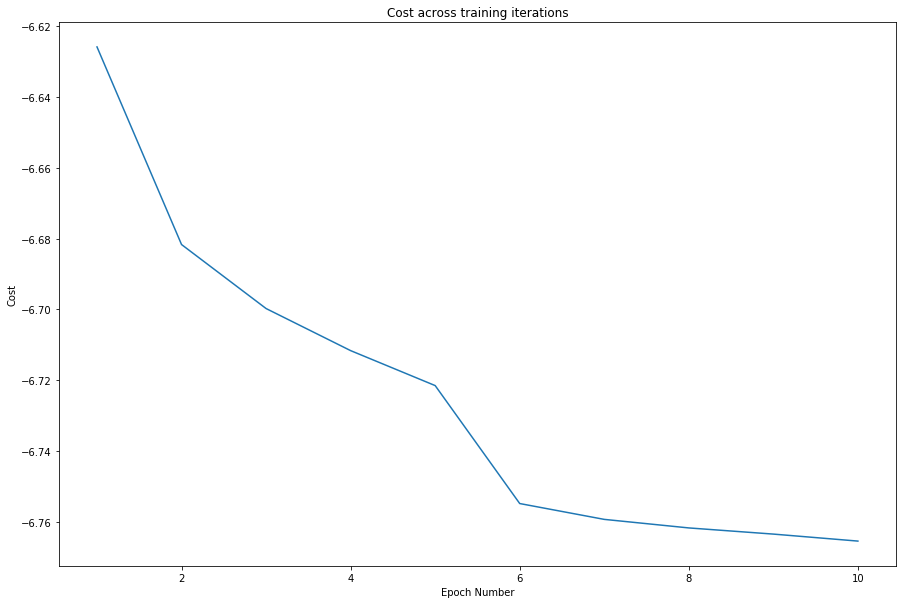

In [530]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_1)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

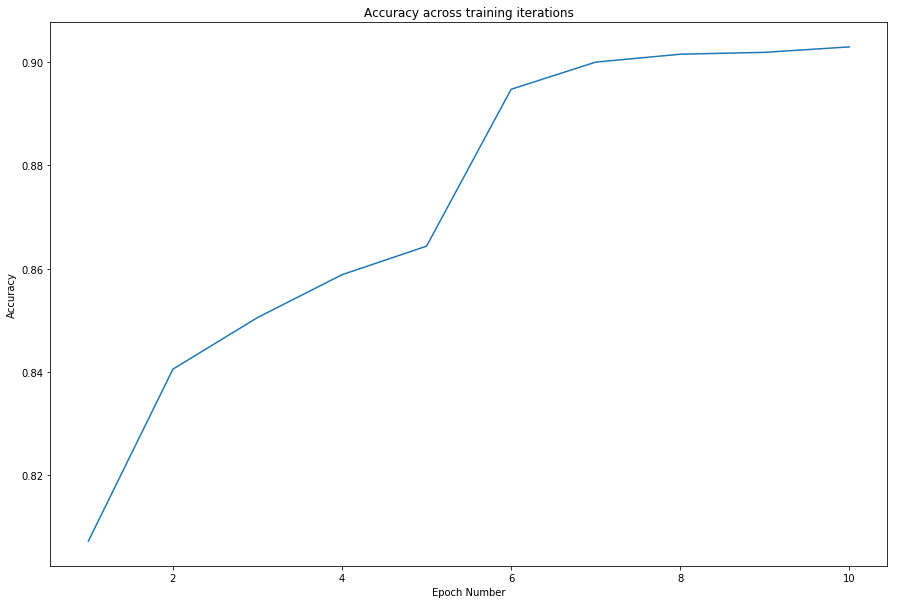

In [531]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_1)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [532]:
evaluate(X_test_norm, y_test, model_1, activation='tanh')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)...
Processing (9001/10000)...
Processing (9501/10000)...

Accuracy on test set: 88.70%


0.887

This image has the label: 8, it's a Bag


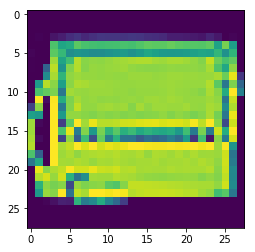

In [533]:
# Pick a random number as image index and visualize it
index_1 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_1])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_1], labels_keywords.iloc[y_test[index_1], 0]))

In [534]:
# Prediction
p_1 = predict(X_test_norm[index_1], y_test[index_1], model_1, activation='tanh')
print('Predicted label is: {}, it\'s a {}'.format(p_1[1], labels_keywords.iloc[int(p_1[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Predicted label is: 8, it's a Bag


<span style='color: red;'>**Observation:**</span> Overall good model performance with the current settings.

Learning rate decrease to 0.001 improved the model's performance. That could be a starting point for the next experiment

<hr>

<a id='section7-2'></a>
[Top](#toc)
#### Experiment 2 model's parameters:
- Range for random weights initialization: -0.5, 0.5
- Number of hidden layers: 1
- Number of classes: 10
- Number of output units: 10
- Activation function: tanh
- Learning rate: 0.001
- Number of training iterations: 10
- Batch size: 512
- No L2 Regularization
- Learning rate step decays by 0.1 every 5 epochs

In [535]:
params_2 = initialize_parameters(X_train_norm, y_train, hidden_layers=1, init_weights=(-0.5, 0.5))

Network architecture:
	Number of hidden layers: 1
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Output layer weights shape: (529, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [536]:
model_2, costs_2, acc_2 = train(X_train_norm, y_train, params_2, activation='tanh',
                                epochs=10, l2_reg=False, dropout=False, learning_rate=0.001)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Training on batch 3 (1536/60000):

***
--------------------------------------------


Training on batch 4 (2048/60000):

****
--------------------------------------------


Tr


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 107 (54784/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):

**********************************************************
--------------------------------------------


Training on batch 50 (25600/60000):

**********************************************************
--------------------------------------------


Training on batch 51 (26112/60000):


************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

*****************************
--------------------------------------------


Training on batch 29 (14848/60000):

*****************************
--------------------------------------------


Training on batch 30 (1536


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 85.51%
Repeat for 7 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.707898445591237
---------------------------------------------------------------------

Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------




Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Tra


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
-----------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------



Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):



Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

Text(0,0.5,'Cost')

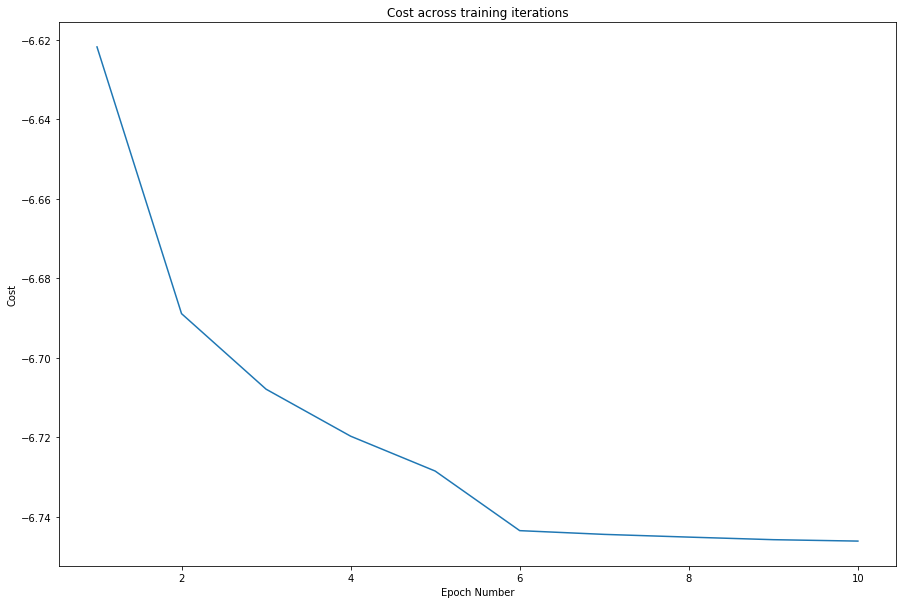

In [537]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_2)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

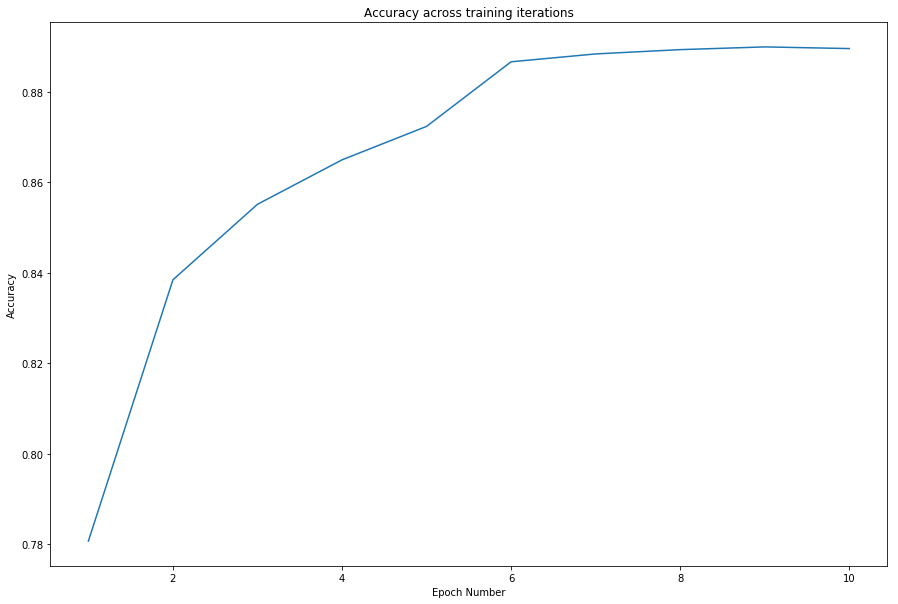

In [538]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_2)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [539]:
evaluate(X_test_norm, y_test, model_2, activation='tanh')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)...
Processing (9001/10000)...
Processing (9501/10000)...

Accuracy on test set: 86.58%


0.8658

This image has the label: 0, it's a T-shirt/Top


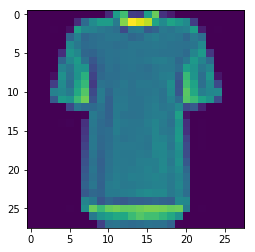

In [540]:
# Pick a random number as image index and visualize it
index_2 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_2])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_2], labels_keywords.iloc[y_test[index_2], 0]))

In [541]:
# Prediction
p_2 = predict(X_test_norm[index_2], y_test[index], model_2, activation='tanh')
print('Predicted label is: {}, it\'s a {}'.format(p_2[1], labels_keywords.iloc[int(p_2[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Predicted label is: 0, it's a T-shirt/Top


<span style='color: red;'>**Observation:**</span> Increasing the weights range did not signficantly worsen the model's performance, although smaller numbers still performed better. Using the learning rate of 0.001 performed well, and decreasing it to 0.0001 did not significantly improve the model's performance.

Possibly the negative effective of increasing the initial weights value outweighed the positive effect of the decreased learning rate. That observation is a good step for the next experiment. The weights will be returned back to [-0.05, 0.05] and the initial learning rate will remain 0.001 as this value was found optimal so far from the previous experiments.

<hr>

<a id='section7-3'></a>
[Top](#toc)
#### Experiment 3 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 1
- Number of classes: 10
- Number of output units: 10
- Activation function: relu
- Learning rate: 0.001
- Number of training iterations: 10
- Batch size: 512
- No L2 Regularization
- Learning rate step decays by 0.1 every 5 epochs

In [542]:
params_3 = initialize_parameters(X_train_norm, y_train, hidden_layers=1, init_weights=(-0.05, 0.05))

Network architecture:
	Number of hidden layers: 1
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Output layer weights shape: (529, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [543]:
model_3, costs_3, acc_3 = train(X_train_norm, y_train, params_3, activation='relu',
                                epochs=10, l2_reg=False, dropout=False, learning_rate=0.001)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Training on batch 3 (1536/60000):

***
--------------------------------------------


Training on batch 4 (2048/60000):

****
--------------------------------------------


Tr


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 107 (54784/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):

**********************************************************
--------------------------------------------


Training on batch 50 (25600/60000):

**********************************************************
--------------------------------------------


Training on batch 51 (26112/60000):


************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

*****************************
--------------------------------------------


Training on batch 29 (14848/60000):

*****************************
--------------------------------------------


Training on batch 30 (1536


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 84.53%
Repeat for 7 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.6590644177096365
---------------------------------------------------------------------

Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------



Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Tra


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
-----------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------



Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):



Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

Text(0,0.5,'Cost')

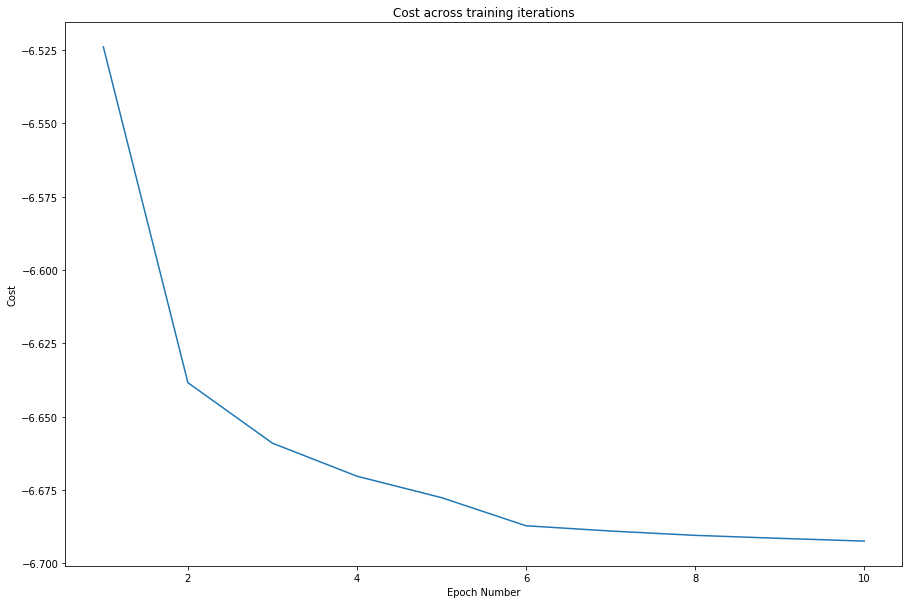

In [545]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_3)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

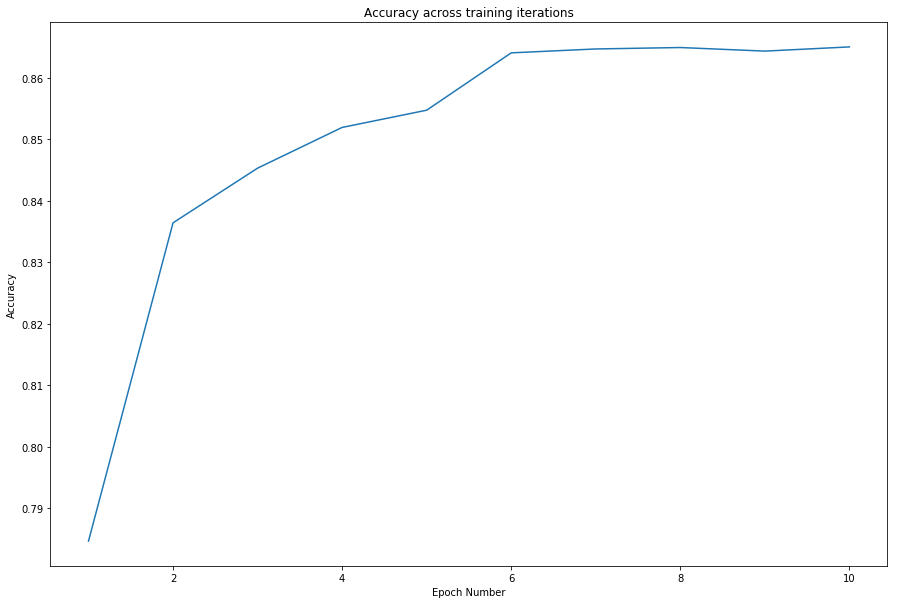

In [546]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_3)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [547]:
evaluate(X_test_norm, y_test, model_3, activation='relu')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)...
Processing (9001/10000)...
Processing (9501/10000)...

Accuracy on test set: 86.20%


0.862

This image has the label: 6, it's a Shirt


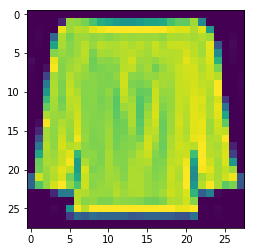

In [548]:
# Pick a random number as image index and visualize it
index_3 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_3])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_3], labels_keywords.iloc[y_test[index_3], 0]))

In [550]:
# Prediction
p_3 = predict(X_test_norm[index_3], y_test[index_3], model_3, activation='relu')
print('Predicted label is: {}, it\'s a {}'.format(p_3[1], labels_keywords.iloc[int(p_3[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Predicted label is: 6, it's a Shirt


<span style='color: red;'>**Observation:**</span> This model's settings did not show any improvements over the previous experiments. In the next experiment, exponential rate decay will be tried and after less number of epochs.

<hr>

<a id='section7-4'></a>
[Top](#toc)
#### Experiment 4 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 1
- Number of classes: 10
- Number of output units: 10
- Activation function: relu
- Learning rate: 0.01
- Number of training iterations: 10
- Batch size: 512
- No L2 Regularization added
- Learning rate step decays by 0.1 every 2 epochs

In [551]:
params_4 = initialize_parameters(X_train_norm, y_train, hidden_layers=1, init_weights=(-0.05, 0.05))

Network architecture:
	Number of hidden layers: 1
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Output layer weights shape: (529, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [552]:
model_4, costs_4, acc_4 = train(X_train_norm, y_train, params_4, activation='relu',
                                epochs=10, l2_reg=False, dropout=False, learning_rate=0.01, optimize_every=2)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Training on batch 3 (1536/60000):

***
--------------------------------------------


Training on batch 4 (2048/60000):

****
--------------------------------------------


Tr


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 107 (54784/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):

**********************************************************
--------------------------------------------


Training on batch 50 (25600/60000):

**********************************************************
--------------------------------------------


Training on batch 51 (26112/60000):


************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

*****************************
--------------------------------------------


Training on batch 29 (14848/60000):

*****************************
--------------------------------------------


Training on batch 30 (1536


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 80.80%
Repeat for 7 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.623139787009767
---------------------------------------------------------------------

Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------




Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

***

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 79 (40448/6000


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 83.51%
Repeat for 4 epochs
--------------------------------------------

Epoch number: 6 ------------> Loss: -6.653084866407358
------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/6000

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/6000


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
---------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------

Text(0,0.5,'Cost')

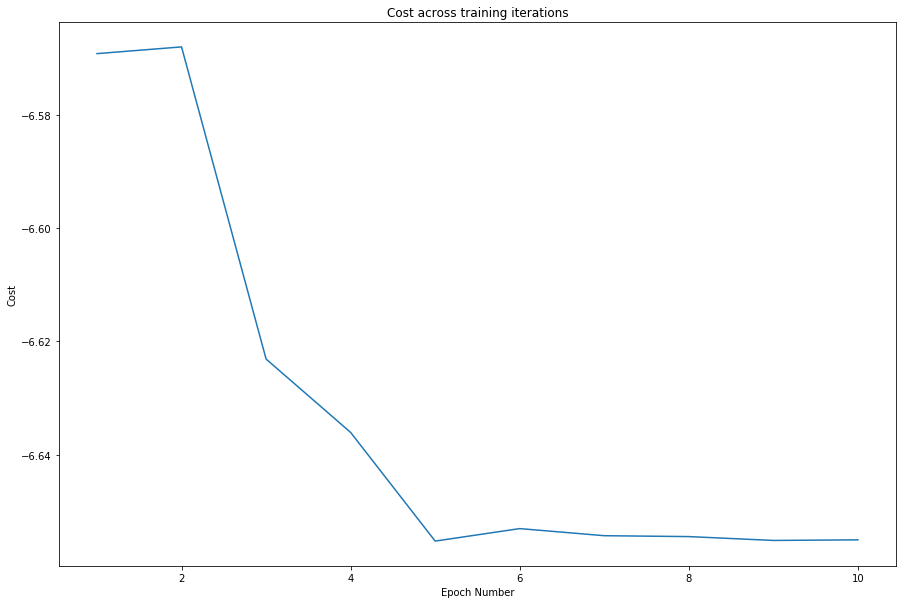

In [553]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_4)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

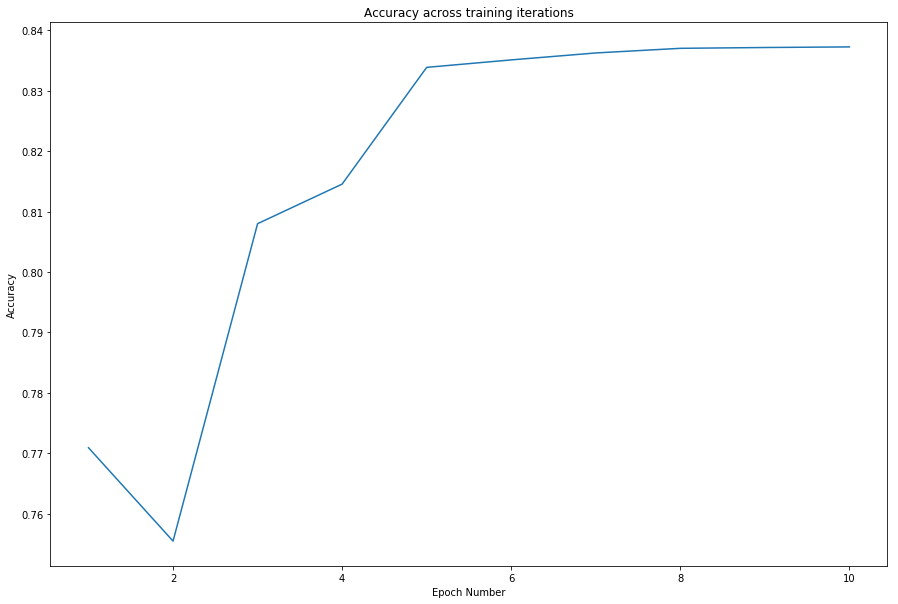

In [554]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_4)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [555]:
evaluate(X_test_norm, y_test, model_4, activation='relu')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)...
Processing (9001/10000)...
Processing (9501/10000)...

Accuracy on test set: 83.32%


0.8332

This image has the label: 5, it's a Sandal


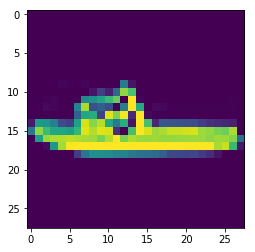

In [556]:
# Pick a random number as image index and visualize it
index_4 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_4])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_4], labels_keywords.iloc[y_test[index_4], 0]))

In [557]:
# Prediction
p_4 = predict(X_test_norm[index_4], y_test[index_4], model_4, activation='relu')
print('Predicted label is: {}, it\'s a {}'.format(p_4[1], labels_keywords.iloc[int(p_4[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Predicted label is: 5, it's a Sandal


<span style='color: red;'>**Observation:**</span> Changing decay of the learning rate to be every 2 epochs did not improve the performance of the model. At this point, may be having more than 1 hidden layer will increase the performance.

<hr>

<a id='section7-5'></a>
[Top](#toc)
#### Experiment 5 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 2
- Number of classes: 10
- Number of output units: 10
- Activation function: tanh
- Learning rate: 0.01
- Number of training iterations: 10
- Batch size: 512
- No L2 Regularization added
- Learning rate step decays by 0.1 every 2 epochs

In [46]:
params_5 = initialize_parameters(X_train_norm, y_train, hidden_layers=2, init_weights=(-0.05, 0.05))

Network architecture:
	Number of hidden layers: 2
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of units in hidden layer 2: 359
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Hidden layer 2 weights shape: (529, 359)
	Hidden layer 2 bias shape: (359, 1)

	Output layer weights shape: (359, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [38]:
model_5, costs_5, acc_5 = train(X_train_norm, y_train, params_5, activation='tanh',
                                epochs=10, l2_reg=False, dropout=False, learning_rate=0.01, optimize_every=2)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 3

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Train

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 66 (33792/6000


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):



Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Tra


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
-----------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 8

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

******************


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
-----------------------------------------

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
-------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/6000


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

***************

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

*************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/6000

*************
--------------------------------------------


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------



********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/6000


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

*************************************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/

Text(0,0.5,'Cost')

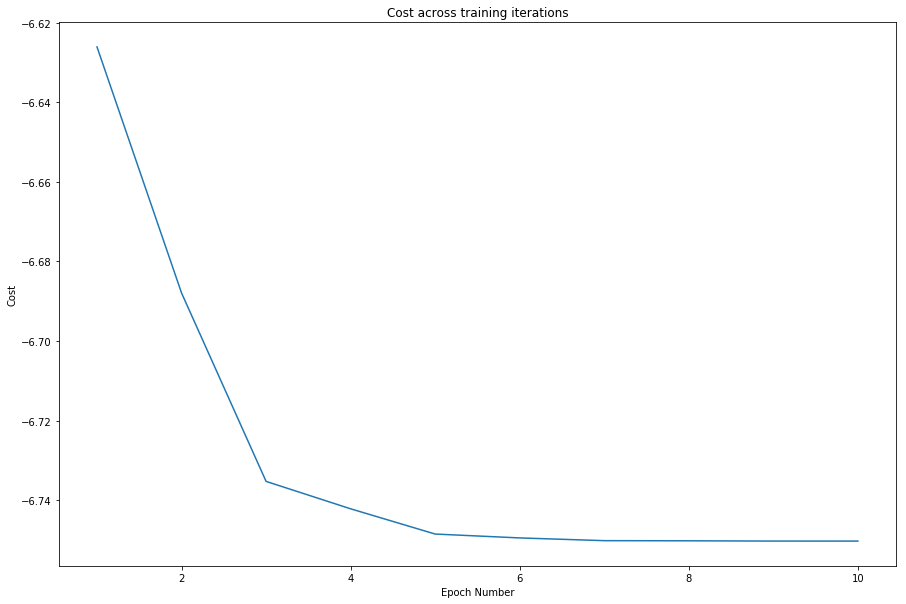

In [40]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_5)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

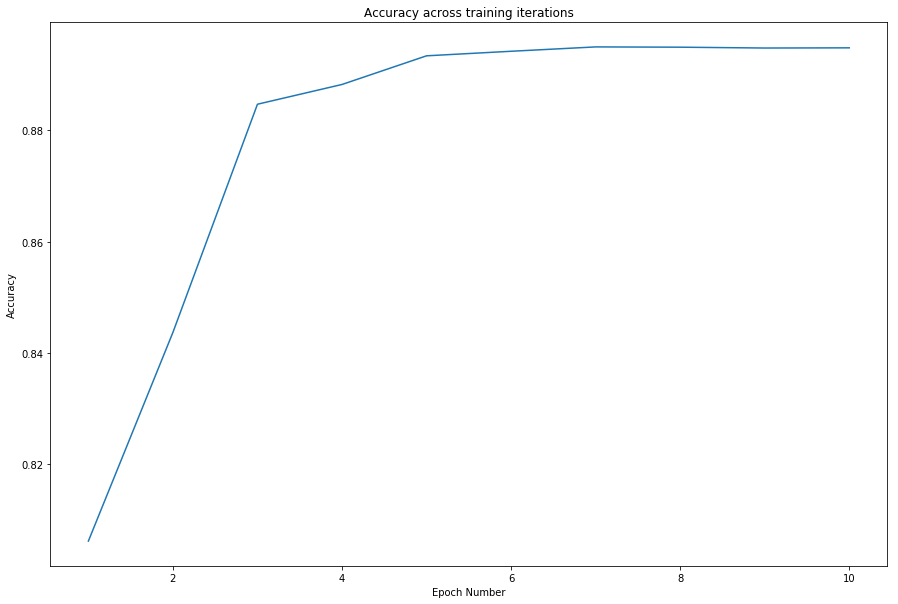

In [41]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_5)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [42]:
evaluate(X_test_norm, y_test, model_5, activation='tanh')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)..

0.8818

This image has the label: 2, it's a Pullover


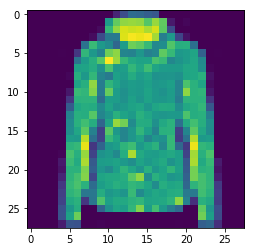

In [43]:
# Pick a random number as image index and visualize it
index_5 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_5])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_5], labels_keywords.iloc[y_test[index_5], 0]))

In [44]:
# Prediction
p_5 = predict(X_test_norm[index_5], y_test[index_5], model_5, activation='tanh')
print('Predicted label is: {}, it\'s a {}'.format(p_5[1], labels_keywords.iloc[int(p_5[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Predicted label is: 4, it's a Coat


<span style='color: red;'>**Observation:**</span> Having 2 hidden layers yielded good results on both training end test runs.

<hr>

<a id='section7-6'></a>
[Top](#toc)
#### Experiment 6 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 2
- Number of classes: 10
- Number of output units: 10
- Activation function: relu
- Learning rate: 0.0001
- Number of training iterations: 10
- Batch size: 512
- L2 Regularization added
- Learning rate step decays by 0.1 every 3 epochs

In [51]:
params_6 = initialize_parameters(X_train_norm, y_train, hidden_layers=2, init_weights=(-0.05, 0.05))

Network architecture:
	Number of hidden layers: 2
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of units in hidden layer 2: 359
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Hidden layer 2 weights shape: (529, 359)
	Hidden layer 2 bias shape: (359, 1)

	Output layer weights shape: (359, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [52]:
model_6, costs_6, acc_6 = train(X_train_norm, y_train, params_6, activation='relu',
                                epochs=10, l2_reg=True, dropout=False, learning_rate=0.0001, optimize_every=3)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 3

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Train

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 66 (33792/6000


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):



Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

***

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 79 (40448/6000


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 71.69%
Repeat for 7 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.425189643169198
------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/6000


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/6000


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on b

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/6000


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
---------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/6000


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/6000


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

***************

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248

Text(0,0.5,'Cost')

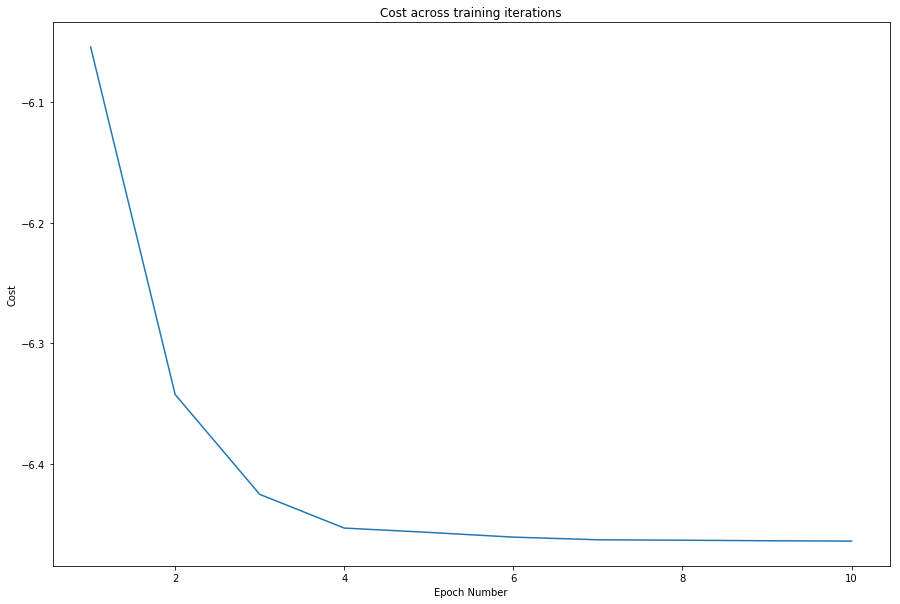

In [53]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_6)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

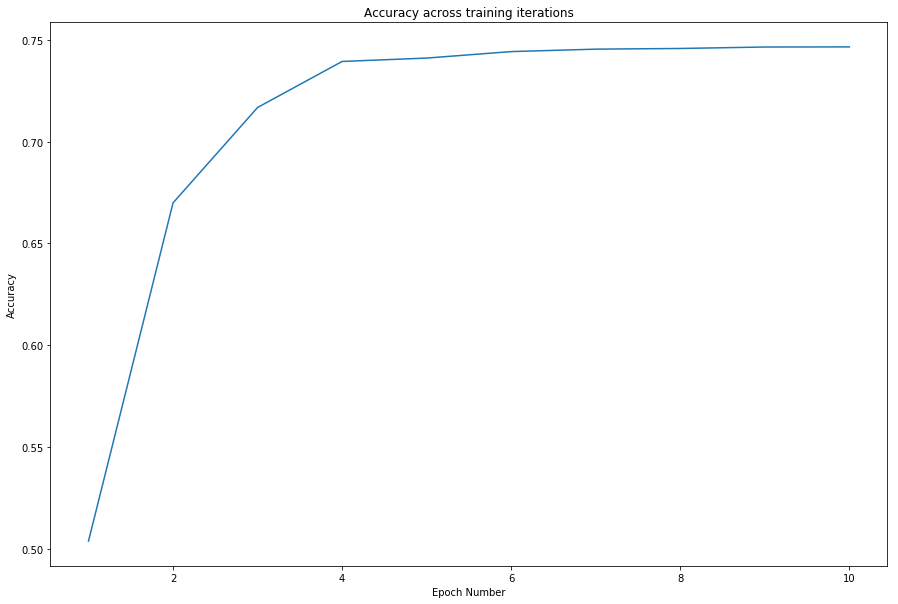

In [54]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_6)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [55]:
evaluate(X_test_norm, y_test, model_6, activation='relu')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)..

0.7472

This image has the label: 1, it's a Trousers


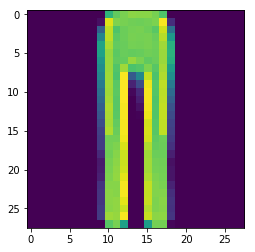

In [56]:
# Pick a random number as image index and visualize it
index_6 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_6])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_6], labels_keywords.iloc[y_test[index_6], 0]))

In [57]:
# Prediction
p_6 = predict(X_test_norm[index_6], y_test[index_6], model_6, activation='relu')
print('Predicted label is: {}, it\'s a {}'.format(p_6[1], labels_keywords.iloc[int(p_6[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Predicted label is: 1, it's a Trousers


<span style='color: red;'>**Observation:**</span> Relu is very sensitive to high values of initial weights and high values of learning rates. It gave many errors without these 2 values being optimal and without introducing L2 regularization. It need more training time and is affected by premature optimazation of the learning rate value.

<hr>

<a id='section7-7'></a>
[Top](#toc)
#### Experiment 7 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 3
- Number of classes: 10
- Number of output units: 10
- Activation function: relu
- Learning rate: 0.0001
- Number of training iterations: 10
- Batch size: 512
- L2 Regularization added
- Learning rate step decays by 0.1 every 5 epochs

In [62]:
params_7 = initialize_parameters(X_train_norm, y_train, hidden_layers=3, init_weights=(-0.05, 0.05))

Network architecture:
	Number of hidden layers: 3
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of units in hidden layer 2: 359
	Number of units in hidden layer 3: 246
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Hidden layer 2 weights shape: (529, 359)
	Hidden layer 2 bias shape: (359, 1)

	Hidden layer 3 weights shape: (359, 246)
	Hidden layer 3 bias shape: (246, 1)

	Output layer weights shape: (246, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [63]:
model_7, costs_7, acc_7 = train(X_train_norm, y_train, params_7, activation='relu',
                                epochs=10, l2_reg=True, dropout=False, learning_rate=0.00001, optimize_every=5)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (246, 1)

- Layer 4:
	Input shape: (246, 1)
	Calculating Z4, the dot product of W4 and A3, then adding b4
	Output shape (A4): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 4

- Calculating loss derivatives for layer 3

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Tra

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/6000


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/6000


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on b

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/6000


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
---------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/6000

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
-------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/6000


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

*************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/6000


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

**********************

********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/6000


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

*************************************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/

Text(0,0.5,'Cost')

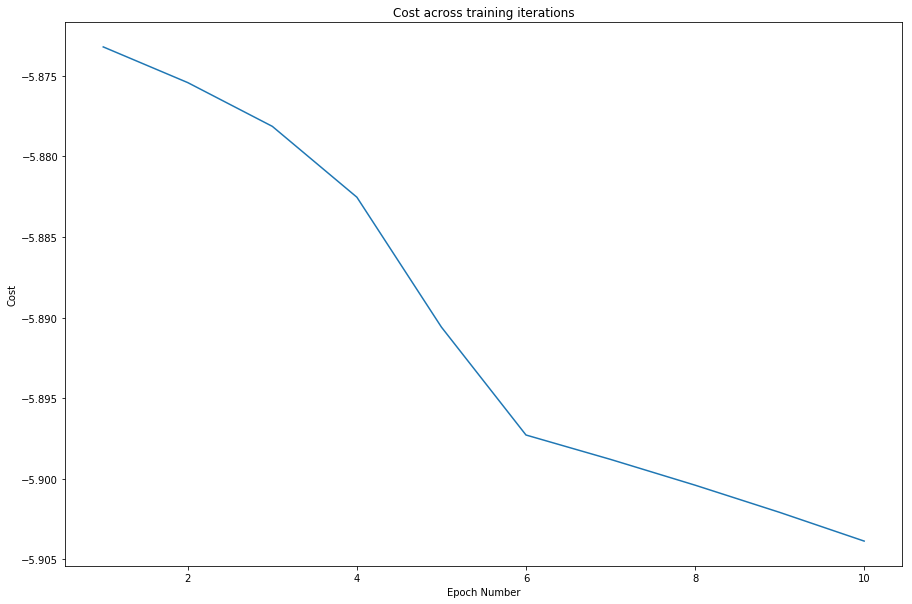

In [64]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_7)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

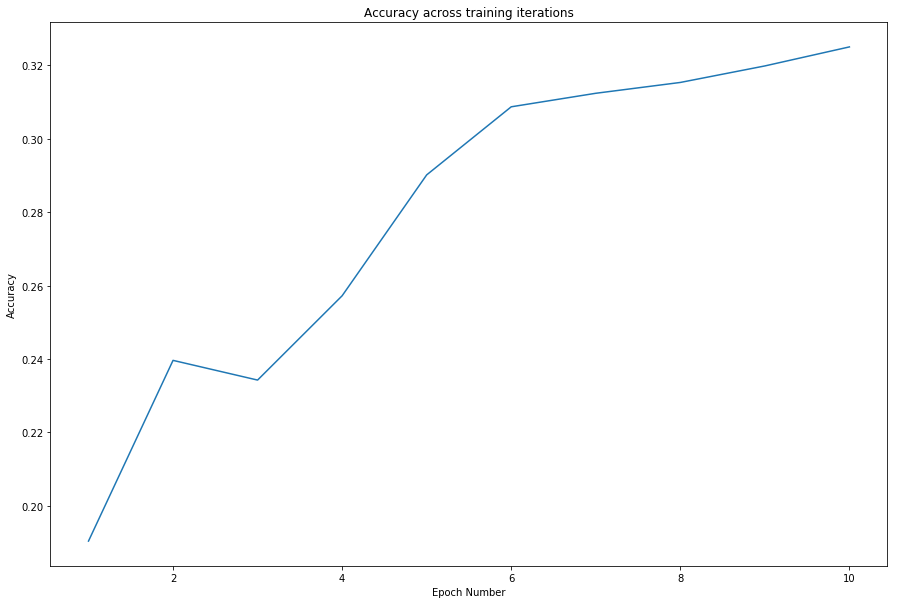

In [65]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_7)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [66]:
evaluate(X_test_norm, y_test, model_7, activation='relu')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (246, 1)

- Layer 4:
	Input shape: (246, 1)
	Calculating Z4, the dot product of W4 and A3, then adding b4
	Output shape (A4): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Process

0.3251

This image has the label: 7, it's a Sneaker


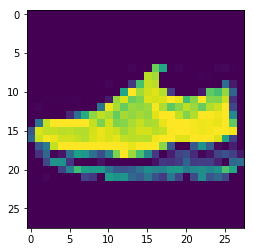

In [67]:
# Pick a random number as image index and visualize it
index_7 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_7])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_7], labels_keywords.iloc[y_test[index_7], 0]))

In [68]:
# Prediction
p_7 = predict(X_test_norm[index_7], y_test[index_7], model_7, activation='relu')
print('Predicted label is: {}, it\'s a {}'.format(p_7[1], labels_keywords.iloc[int(p_7[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (246, 1)

- Layer 4:
	Input shape: (246, 1)
	Calculating Z4, the dot product of W4 and A3, then adding b4
	Output shape (A4): (10, 1)
--------------------------------------------

Predicted label is: 9, it's a Ankle Boot


<span style='color: red;'>**Observation:**</span> Relu is very sensitive to high values of initial weights and high values of learning rates. It gave many errors without these 2 values being optimal and without introducing L2 regularization. It need more training time and is affected by premature optimazation of the learning rate value. This model is the worst in performance so far and is the first one to predict a wrong label, although the difference between the prediction and actual item is not very far off.

<hr>

<a id='section7-8'></a>
[Top](#toc)
#### Experiment 8 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 2
- Number of classes: 10
- Number of output units: 10
- Activation function: relu
- Learning rate: 0.001
- Number of training iterations: 10
- Batch size: 512
- No L2 Regularization added
- No Dropout
- Learning rate step decays by 0.1 every 5 epochs

In [74]:
params_8 = initialize_parameters(X_train_norm, y_train, hidden_layers=2, init_weights=(-0.05, 0.05), hidden_unit_factor=(1/2))

Network architecture:
	Number of hidden layers: 2
	Number of input units: 784
	Number of units in hidden layer 1: 397
	Number of units in hidden layer 2: 203
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 397)
	Hidden layer 1 bias shape: (397, 1)

	Hidden layer 2 weights shape: (397, 203)
	Hidden layer 2 bias shape: (203, 1)

	Output layer weights shape: (203, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [75]:
model_8, costs_8, acc_8 = train(X_train_norm, y_train, params_8, activation='relu',
                                epochs=10, l2_reg=False, dropout=False, learning_rate=0.001, optimize_every=5)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (397, 1)

- Layer 2:
	Input shape: (397, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (203, 1)

- Layer 3:
	Input shape: (203, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 3

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Train

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 66 (33792/6000


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):



Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

***

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 79 (40448/6000


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 84.30%
Repeat for 7 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.663128608364786
------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/6000


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/6000

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

***********************

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/6000


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
---------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/6000


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/6000


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248

Text(0,0.5,'Cost')

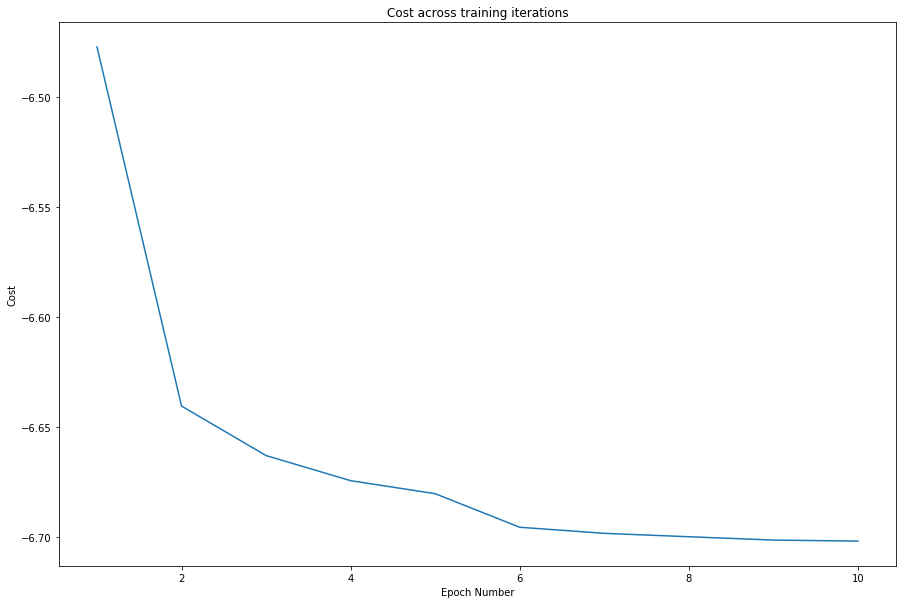

In [76]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), costs_8)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

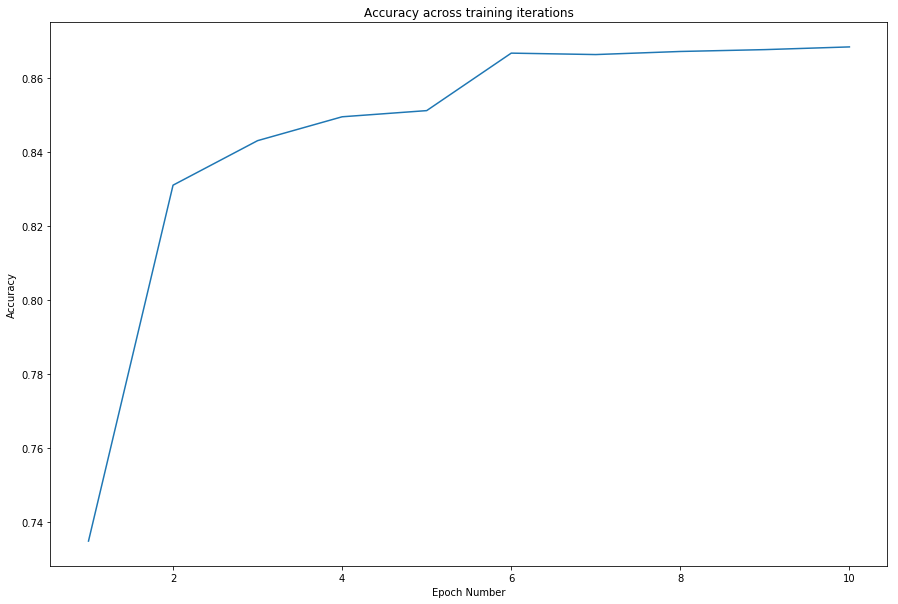

In [77]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), acc_8)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [78]:
evaluate(X_test_norm, y_test, model_8, activation='relu')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (397, 1)

- Layer 2:
	Input shape: (397, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (203, 1)

- Layer 3:
	Input shape: (203, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)..

0.8635

This image has the label: 3, it's a Dress


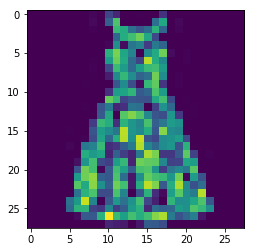

In [79]:
# Pick a random number as image index and visualize it
index_8 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_8])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_8], labels_keywords.iloc[y_test[index_8], 0]))

In [80]:
# Prediction
p_8 = predict(X_test_norm[index_8], y_test[index_8], model_8, activation='relu')
print('Predicted label is: {}, it\'s a {}'.format(p_8[1], labels_keywords.iloc[int(p_8[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (397, 1)

- Layer 2:
	Input shape: (397, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (203, 1)

- Layer 3:
	Input shape: (203, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Predicted label is: 3, it's a Dress


<span style='color: red;'>**Observation:**</span> Hidden unit factor has been changed so that each layer would have half the sum of units of the previous and successive layers. The change didn't seem to improve the model.

<hr>

<a id='section7-9'></a>
[Top](#toc)
#### Experiment 9 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 2
- Number of classes: 10
- Number of output units: 10
- Activation function: tanh
- Learning rate: 0.001
- Number of training iterations: 20
- Batch size: 512
- No L2 Regularization added
- No Dropout
- Learning rate exponentially decays every 5 epochs

In [91]:
params_9 = initialize_parameters(X_train_norm, y_train, hidden_layers=2, init_weights=(-0.05, 0.05), hidden_unit_factor=(2/3))

Network architecture:
	Number of hidden layers: 2
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of units in hidden layer 2: 359
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Hidden layer 2 weights shape: (529, 359)
	Hidden layer 2 bias shape: (359, 1)

	Output layer weights shape: (359, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [92]:
model_9, costs_9, acc_9 = train(X_train_norm, y_train, params_9, activation='tanh',
                                epochs=20, l2_reg=False, dropout=False, learning_rate=0.01,
                                lr_optimizer='exp_decay', optimize_every=5)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 3

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Train

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 66 (33792/6000


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):



Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

***

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 79 (40448/6000


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 85.74%
Repeat for 17 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.708846875487877
-----------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/6000


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/6000

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

***********************

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/6000


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
---------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/6000


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/6000


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

*************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/6000


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

**********************

********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/6000


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

*************************************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/


Training on batch 37 (18944/60000):

***************************************
--------------------------------------------


Training on batch 38 (19456/60000):

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

******************

********************************************************************************************************************
--------------------------------------------


Training on batch 85 (43520/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/6000


Training on batch 12 (6144/60000):

*************
--------------------------------------------


Training on batch 13 (6656/60000):

*************
--------------------------------------------


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
---------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 71 (36352/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/6000


Training on batch 111 (56832/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 56 (28672/60000):

**********************************************************
--------------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

**************************

********************************************************************************************************************
--------------------------------------------


Training on batch 98 (50176/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/6

Text(0,0.5,'Cost')

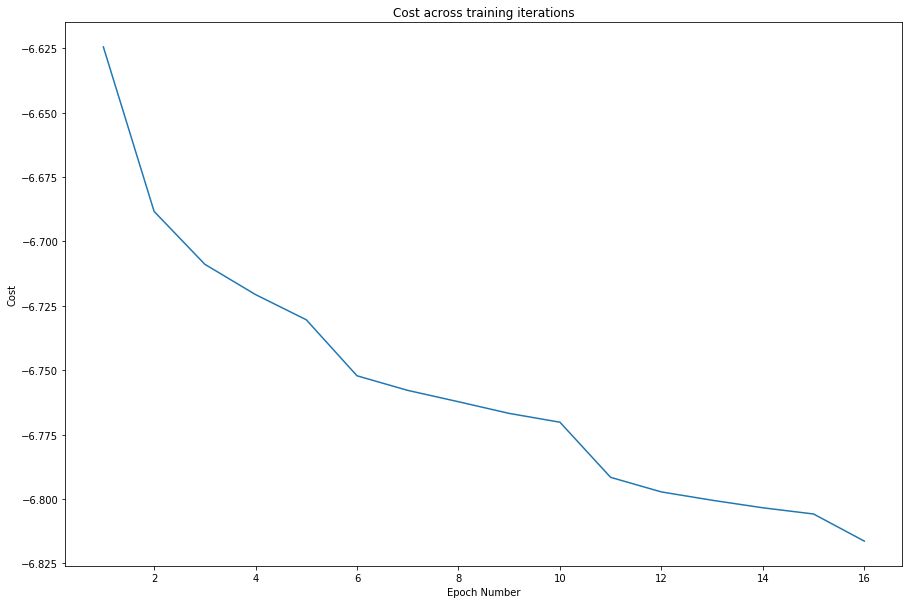

In [94]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 17), costs_9)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

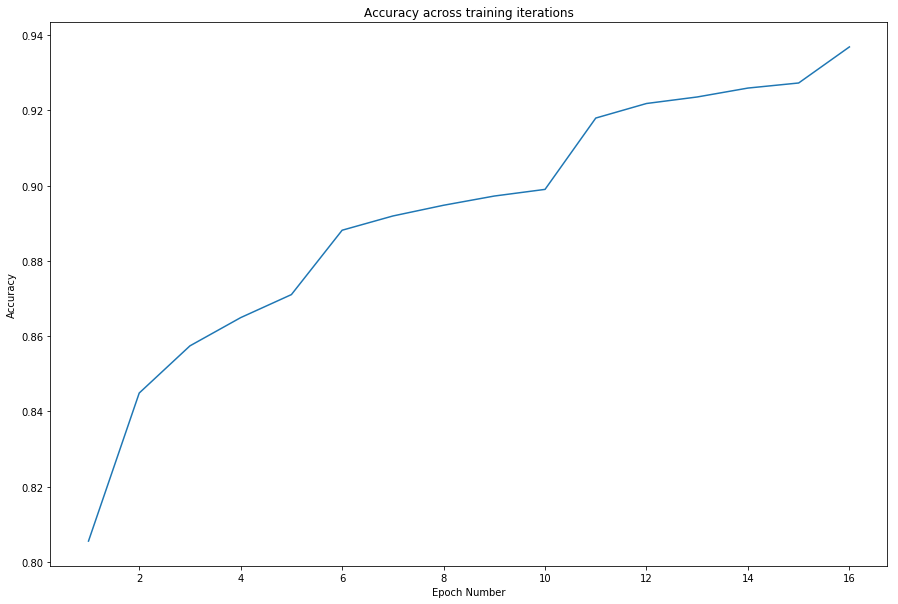

In [95]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 17), acc_9)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [96]:
evaluate(X_test_norm, y_test, model_9, activation='tanh')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)..

0.8972

This image has the label: 8, it's a Bag


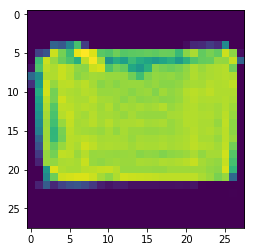

In [97]:
# Pick a random number as image index and visualize it
index_9 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_9])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_9], labels_keywords.iloc[y_test[index_9], 0]))

In [98]:
# Prediction
p_9 = predict(X_test_norm[index_9], y_test[index_9], model_9, activation='tanh')
print('Predicted label is: {}, it\'s a {}'.format(p_9[1], labels_keywords.iloc[int(p_9[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (359, 1)

- Layer 3:
	Input shape: (359, 1)
	Calculating Z3, the dot product of W3 and A2, then adding b3
	Output shape (A3): (10, 1)
--------------------------------------------

Predicted label is: 8, it's a Bag


<span style='color: red;'>**Observation:**</span> Increasing the number of epochs gave the model more time to learn and optimize the learning rate.

<hr>

<a id='section7-10'></a>
[Top](#toc)
#### Experiment 10 model's parameters:
- Range for random weights initialization: -0.05, 0.05
- Number of hidden layers: 1
- Number of classes: 10
- Number of output units: 10
- Activation function: tanh
- Learning rate: 0.001
- Number of training iterations: 20
- Batch size: 512
- No L2 Regularization added
- No Dropout
- Learning rate exponentially decays every 5 epochs

In [115]:
params_10 = initialize_parameters(X_train_norm, y_train, hidden_layers=1, init_weights=(-0.05, 0.05))

Network architecture:
	Number of hidden layers: 1
	Number of input units: 784
	Number of units in hidden layer 1: 529
	Number of output units: 10
-----------------------------------------------------

Initial weights matrix shape:
	Hidden layer 1 weights shape: (784, 529)
	Hidden layer 1 bias shape: (529, 1)

	Output layer weights shape: (529, 10)
	Output layer bias shape: (10, 1)

Weights and biases initialized successfully.
--------------------------------------------



In [116]:
model_10, costs_10, acc_10 = train(X_train_norm, y_train, params_10, activation='tanh',
                                epochs=20, l2_reg=False, dropout=False, learning_rate=0.01,
                                lr_optimizer='exp_decay', optimize_every=5)

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Starting backpropagation of errors for sample no. 1:

- Calculating loss derivatives for layer 2

- Calculating loss derivatives for layer 1
--------------------------------------------

Updating weights and biases

--------------------------------------------


Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------


Training on batch 3 (1536/60000):

***
--------------------------------------------


Training on batch 4 (2048/60000):

****
--------------------------------------------


Tr

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 66 (33792/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 67 (34304/6000


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 107 (54784/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):

**********************************************************
--------------------------------------------


Training on batch 50 (25600/60000):

**********************************************************
--------------------------------------------


Training on batch 51 (26112/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 93 (47616/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 94 (48128/6000

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Training on batch 28 (14336/60000):

*****************************
--------------------------------------------


Training on batch 29 (14848/60000):

*****************************
--------------------------------------------


Training on batch 30 (1536

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 79 (40448/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 80 (40960/6000


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 85.22%
Repeat for 17 epochs
--------------------------------------------

Epoch number: 3 ------------> Loss: -6.70198358459626
---------------------------------------------------------------------

Training on batch 1 (512/60000):

*
--------------------------------------------


Training on batch 2 (1024/60000):

**
--------------------------------------------



********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 65 (33280/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 66 (33792/6000


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 105 (53760/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 106 (54272/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


Training on batch 47 (24064/60000):

**********************************************************
--------------------------------------------


Training on batch 48 (24576/60000):

**********************************************************
--------------------------------------------


Training on batch 49 (25088/60000):



Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 92 (47104/60000):

********************************************************************************************************************
-----------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):

*****************************
--------------------------------------------


Training on batch 26 (13312/60000):

*****************************
--------------------------------------------


Training on batch 27 (13824/60000):

*****************************
--------------------------------------------


Tra


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 78 (39936/60000):

********************************************************************************************************************
-----------------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 118 (60000/60000):

*****************************************************************************************************************************
--------------------------------------------

Training accuracy: 8

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 64 (32768/6000


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248/60000):

********************************************************************************************************************
------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

**********************************************************
--------------------------------------------


Training on batch 46 (23552/60000):

**********************************************************
--------------------------------------------


********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 91 (46592/6000


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

************************
--------------------------------------------


Training on batch 24 (12288/60000):

*****************************
--------------------------------------------


Training on batch 25 (12800/60000):


********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 77 (39424/6000


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 117 (59904/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 63 (32256/60000):

*****************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 104 (53248

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

**********************************************************
--------------------------------------------


Training on batch 45 (23040/60000):

*************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 90 (46080/6000


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
--------------------------------------------


Training on batch 22 (11264/60000):

************************
--------------------------------------------


Training on batch 23 (11776/60000):

**********************

********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 76 (38912/6000


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 116 (59392/60000):

********************************************************************************************************************
------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 62 (31744/60000):

*************************************************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 103 (52736/


Training on batch 37 (18944/60000):

***************************************
--------------------------------------------


Training on batch 38 (19456/60000):

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
--------------------------------------------


Training on batch 43 (22016/60000):

**********************************************************
--------------------------------------------


Training on batch 44 (22528/60000):

******************

********************************************************************************************************************
--------------------------------------------


Training on batch 85 (43520/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 89 (45568/6000


Training on batch 12 (6144/60000):

*************
--------------------------------------------


Training on batch 13 (6656/60000):

*************
--------------------------------------------


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


Training on batch 20 (10240/60000):

************************
--------------------------------------------


Training on batch 21 (10752/60000):

************************
---------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 71 (36352/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 75 (38400/6000


Training on batch 111 (56832/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 115 (58880/60000):

********************************************************************************************************************
------------------------------------

**********************************************************
--------------------------------------------


Training on batch 56 (28672/60000):

**********************************************************
--------------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 61 (31232/60000):

**************************

********************************************************************************************************************
--------------------------------------------


Training on batch 98 (50176/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 102 (52224/6

***************************************
--------------------------------------------


Training on batch 36 (18432/60000):

***************************************
--------------------------------------------


Training on batch 37 (18944/60000):

***************************************
--------------------------------------------


Training on batch 38 (19456/60000):

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (20992/60000):

**********************************************************
--------------------------------------------


Training on batch 42 (21504/60000):

**********************************************************
-----------------------------------

********************************************************************************************************************
--------------------------------------------


Training on batch 84 (43008/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 85 (43520/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 88 (45056/6000


Training on batch 10 (5120/60000):

***********
--------------------------------------------


Training on batch 11 (5632/60000):

************
--------------------------------------------


Training on batch 12 (6144/60000):

*************
--------------------------------------------


Training on batch 13 (6656/60000):

*************
--------------------------------------------


Training on batch 14 (7168/60000):

***************
--------------------------------------------


Training on batch 15 (7680/60000):

*****************
--------------------------------------------


Training on batch 16 (8192/60000):

*****************
--------------------------------------------


Training on batch 17 (8704/60000):

********************
--------------------------------------------


Training on batch 18 (9216/60000):

********************
--------------------------------------------


Training on batch 19 (9728/60000):

********************
--------------------------------------------


T

********************************************************************************************************************
--------------------------------------------


Training on batch 70 (35840/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 71 (36352/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 72 (36864/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 73 (37376/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 74 (37888/6000


Training on batch 110 (56320/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 111 (56832/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 112 (57344/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 113 (57856/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 114 (58368/60000):

********************************************************************************************************************
------------------------------------


Training on batch 54 (27648/60000):

**********************************************************
--------------------------------------------


Training on batch 55 (28160/60000):

**********************************************************
--------------------------------------------


Training on batch 56 (28672/60000):

**********************************************************
--------------------------------------------


Training on batch 57 (29184/60000):

**********************************************************
--------------------------------------------


Training on batch 58 (29696/60000):

**********************************************************
--------------------------------------------


Training on batch 59 (30208/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 60 (30720/60000):

**********************************************

********************************************************************************************************************
--------------------------------------------


Training on batch 97 (49664/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 98 (50176/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 99 (50688/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 100 (51200/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 101 (51712/60

***************************************
--------------------------------------------


Training on batch 34 (17408/60000):

***************************************
--------------------------------------------


Training on batch 35 (17920/60000):

***************************************
--------------------------------------------


Training on batch 36 (18432/60000):

***************************************
--------------------------------------------


Training on batch 37 (18944/60000):

***************************************
--------------------------------------------


Training on batch 38 (19456/60000):

***************************************
--------------------------------------------


Training on batch 39 (19968/60000):

***************************************
--------------------------------------------


Training on batch 40 (20480/60000):

**********************************************************
--------------------------------------------


Training on batch 41 (2099

********************************************************************************************************************
--------------------------------------------


Training on batch 83 (42496/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 84 (43008/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 85 (43520/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 86 (44032/60000):

********************************************************************************************************************
--------------------------------------------


Training on batch 87 (44544/6000

Text(0,0.5,'Cost')

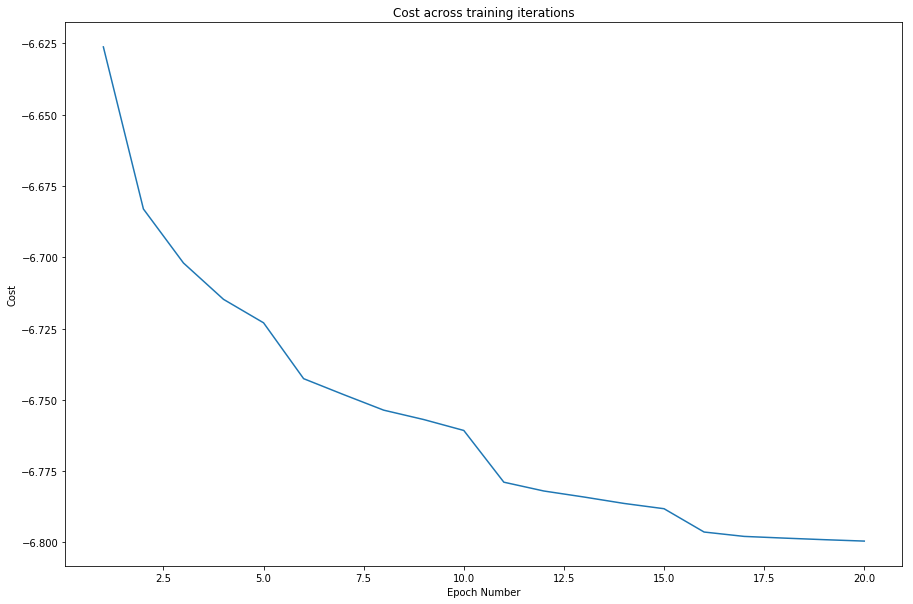

In [117]:
# Plot the cost change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 21), costs_10)
plt.title("Cost across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Cost")

Text(0,0.5,'Accuracy')

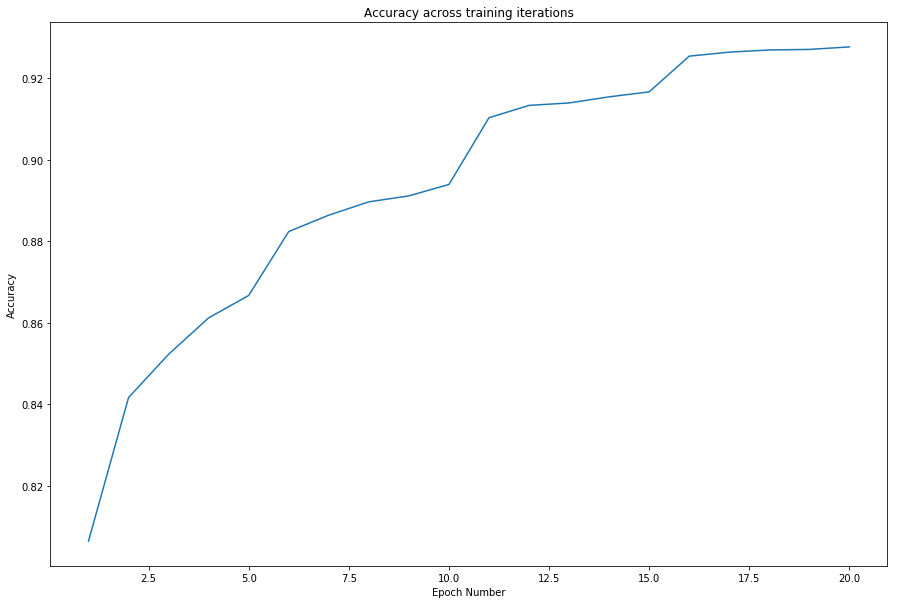

In [118]:
# Plot the accuracy change across epochs
plt.figure(figsize=(15,10))
plt.plot(range(1, 21), acc_10)
plt.title("Accuracy across training iterations")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

In [119]:
evaluate(X_test_norm, y_test, model_10, activation='tanh')

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Processing (1/10000)...
Processing (501/10000)...
Processing (1001/10000)...
Processing (1501/10000)...
Processing (2001/10000)...
Processing (2501/10000)...
Processing (3001/10000)...
Processing (3501/10000)...
Processing (4001/10000)...
Processing (4501/10000)...
Processing (5001/10000)...
Processing (5501/10000)...
Processing (6001/10000)...
Processing (6501/10000)...
Processing (7001/10000)...
Processing (7501/10000)...
Processing (8001/10000)...
Processing (8501/10000)...
Processing (9001/10000)...
Processing (9501/10000)...

Accuracy on test set: 89.51%


0.8951

This image has the label: 9, it's a Ankle Boot


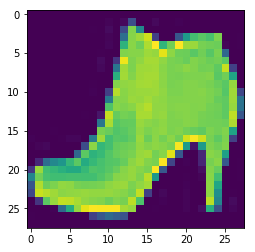

In [120]:
# Pick a random number as image index and visualize it
index_10 = int(np.random.randint(low=0, high=10000))
plt.imshow(unflattened_X_test[index_10])
print('This image has the label: {}, it\'s a {}'.format(y_test[index_10], labels_keywords.iloc[y_test[index_10], 0]))

In [121]:
# Prediction
p_10 = predict(X_test_norm[index_10], y_test[index_10], model_10, activation='tanh')
print('Predicted label is: {}, it\'s a {}'.format(p_10[1], labels_keywords.iloc[int(p_10[1]), 0]))

Starting feed forward of input information for sample no. 1:

- Input Layer (A0)
	Shape (784, 1)

- Layer 1:
	Input shape: (784, 1)
	Calculating Z1, the dot product of W1 and A0, then adding b1
	Output shape (A1): (529, 1)

- Layer 2:
	Input shape: (529, 1)
	Calculating Z2, the dot product of W2 and A1, then adding b2
	Output shape (A2): (10, 1)
--------------------------------------------

Predicted label is: 9, it's a Ankle Boot


<span style='color: red;'>**Observation:**</span> Model performs slightly similar to the previous one.